In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
blobs = pd.read_csv("/content/cluster_blobs.csv")

In [4]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<Axes: xlabel='X1', ylabel='X2'>

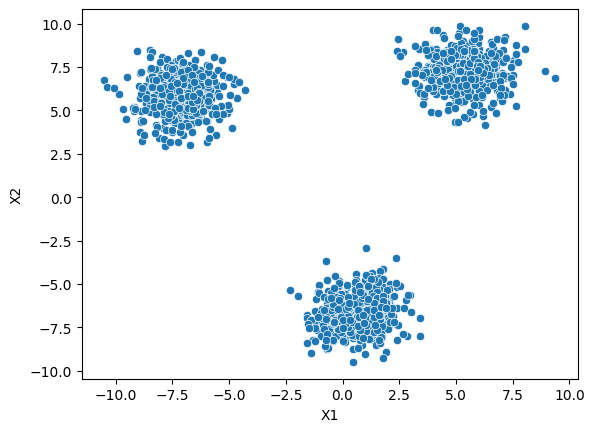

In [5]:
sns.scatterplot(data=blobs, x="X1", y="X2")

In [6]:
moons = pd.read_csv("/content/cluster_moons.csv")

In [7]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<Axes: xlabel='X1', ylabel='X2'>

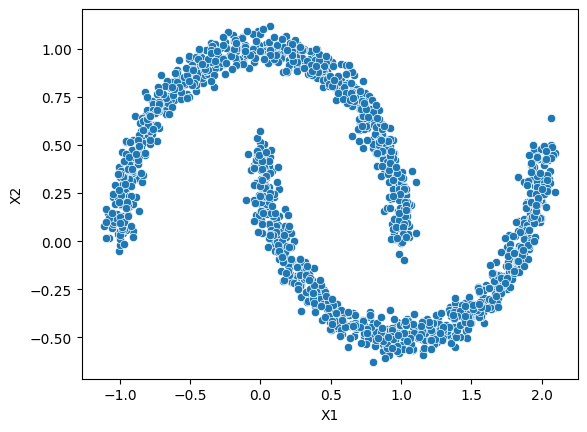

In [8]:
sns.scatterplot(data=moons, x="X1", y="X2")

In [13]:
circles = pd.read_csv("/content/cluster_circles.csv")

In [14]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<Axes: xlabel='X1', ylabel='X2'>

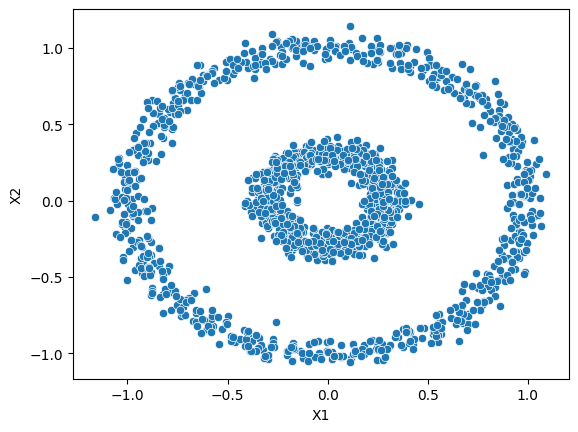

In [15]:
sns.scatterplot(data=circles, x="X1", y="X2")

In [16]:
def display_categories(model, data):
  labels = model.fit_predict(data)
  sns.scatterplot(data=data, x="X1", y="X2", hue=labels, palette="Set1")

In [17]:
from sklearn.cluster import KMeans

In [19]:
model = KMeans(n_clusters=3)

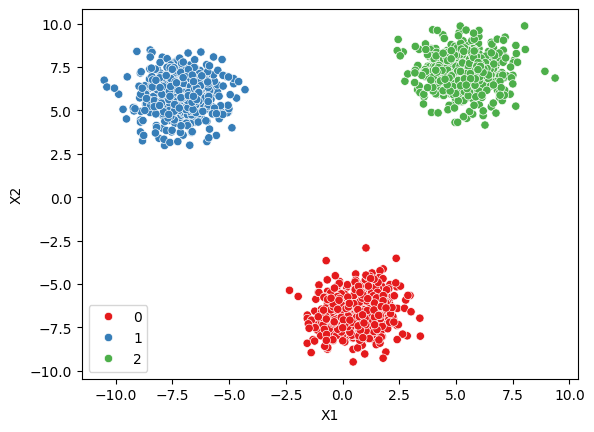

In [20]:
display_categories(model, blobs)

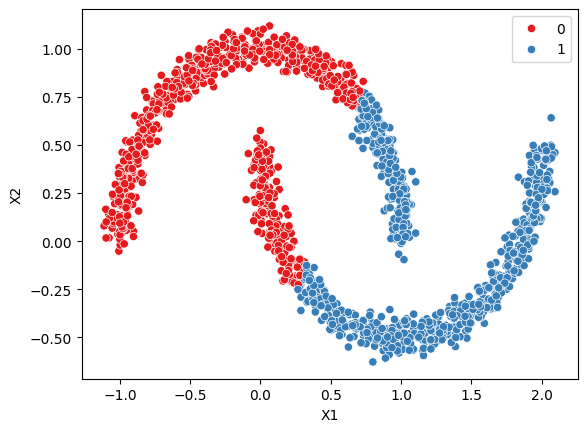

In [25]:
model = KMeans(n_clusters=2)
display_categories(model, moons)

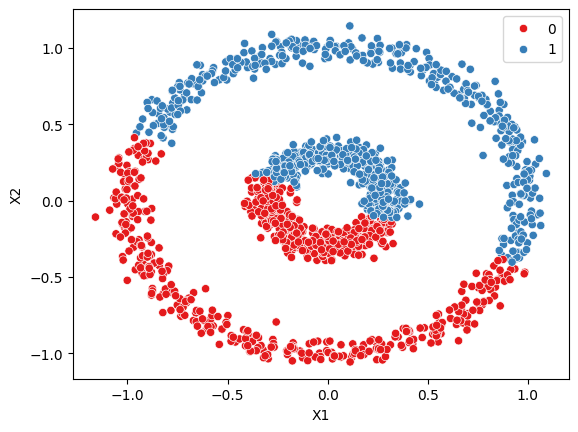

In [28]:
model = KMeans(n_clusters=2)
display_categories(model, circles)

In [29]:
from sklearn.cluster import DBSCAN

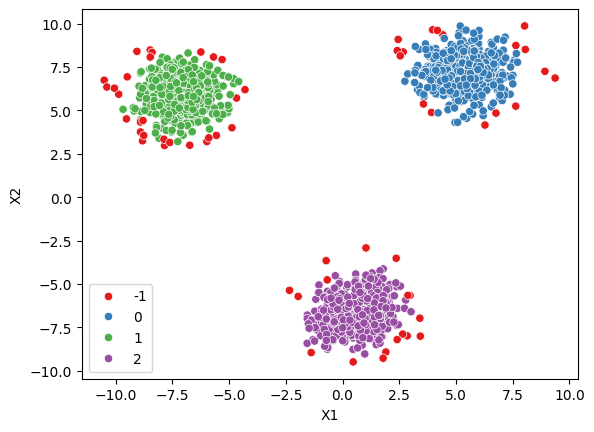

In [31]:
model = DBSCAN()
display_categories(model, blobs)

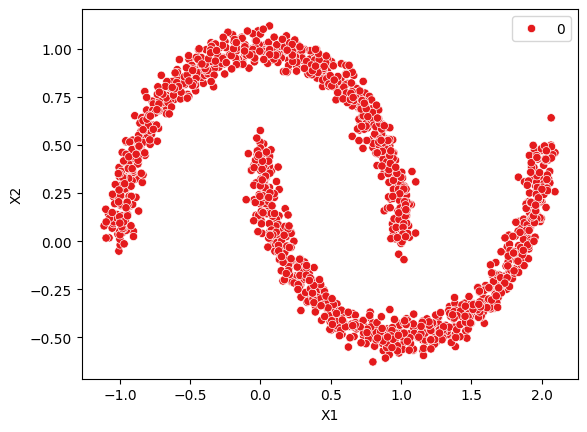

In [32]:
model = DBSCAN()
display_categories(model, moons)

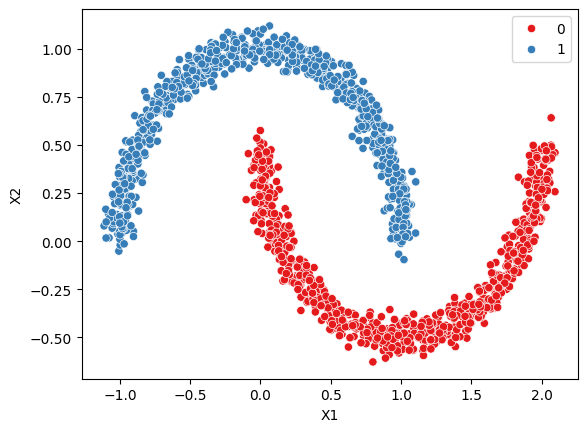

In [33]:
model = DBSCAN(eps=0.15)
display_categories(model, moons)

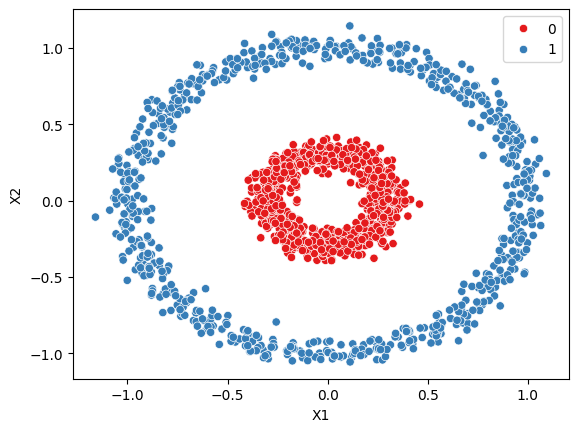

In [35]:
model = DBSCAN(eps=0.15)
display_categories(model, circles)

In [36]:
two_blobs = pd.read_csv("/content/cluster_two_blobs.csv")

In [37]:
two_blobs_outliers = pd.read_csv("/content/cluster_two_blobs_outliers.csv")

<Axes: xlabel='X1', ylabel='X2'>

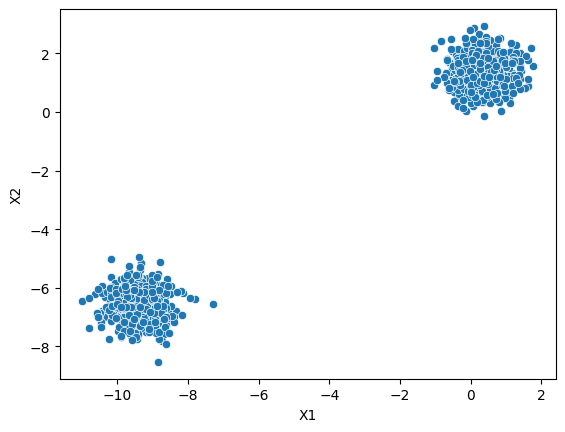

In [38]:
sns.scatterplot(data=two_blobs,x="X1", y="X2")

<Axes: xlabel='X1', ylabel='X2'>

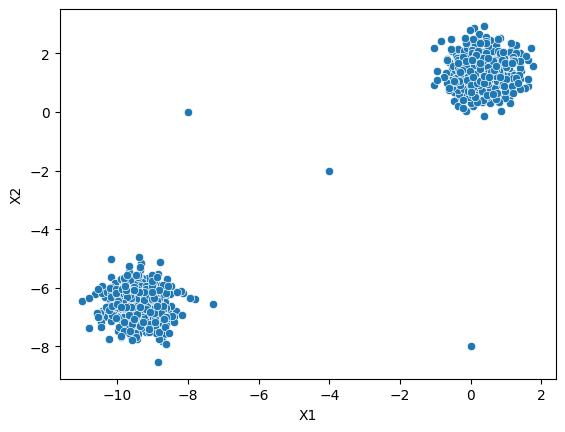

In [39]:
sns.scatterplot(data=two_blobs_outliers,x="X1", y="X2")

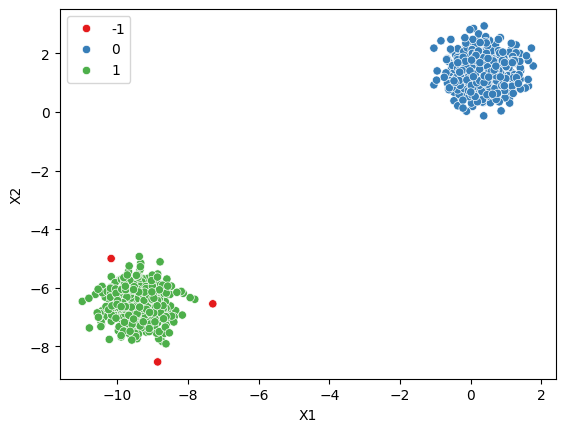

In [40]:
dbscan = DBSCAN()
display_categories(dbscan,two_blobs)

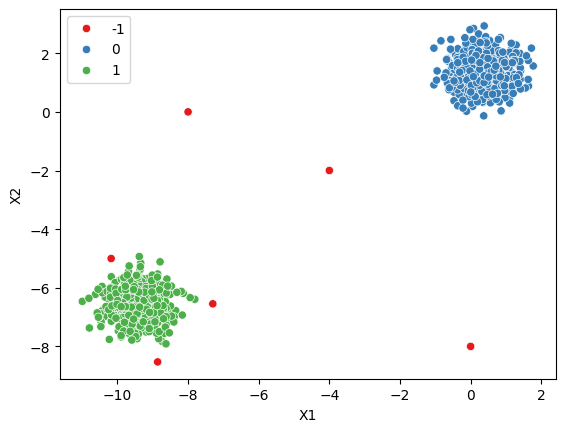

In [41]:
display_categories(dbscan,two_blobs_outliers)

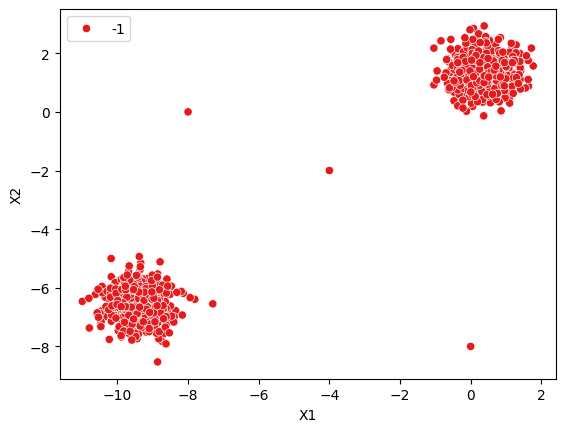

In [42]:
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan,two_blobs_outliers)

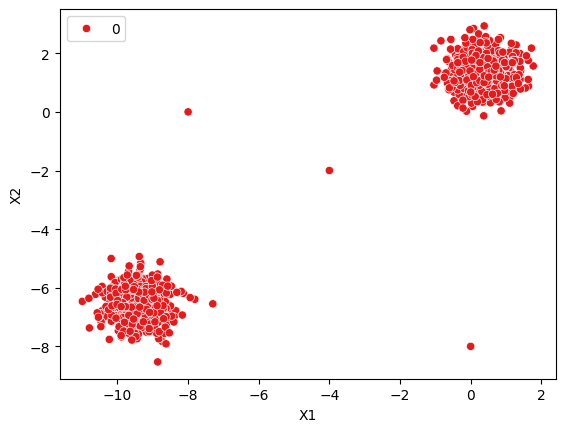

In [43]:
dbscan = DBSCAN(eps=10)
display_categories(dbscan,two_blobs_outliers)

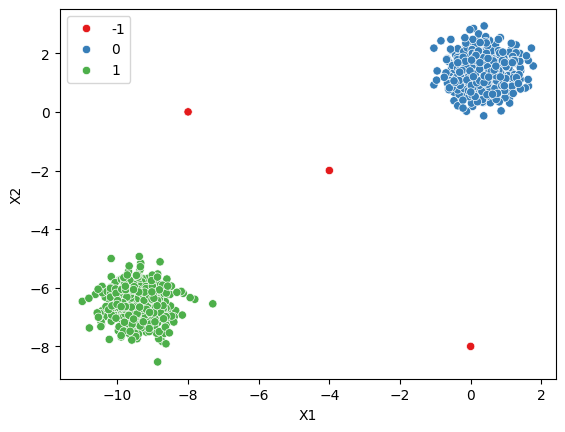

In [61]:
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan,two_blobs_outliers)

In [46]:
np.sum(dbscan.labels_ == -1)

np.int64(3)

In [47]:
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

np.float64(0.29910269192422734)

In [48]:
len(dbscan.labels_)

1003

In [52]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 7, 200):
  dbscan = DBSCAN(eps=eps)
  dbscan.fit(two_blobs_outliers)

  number_of_outliers.append(np.sum(dbscan.labels_ == -1))

  percent_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
  outlier_percent.append(percent_outliers)

<Axes: >

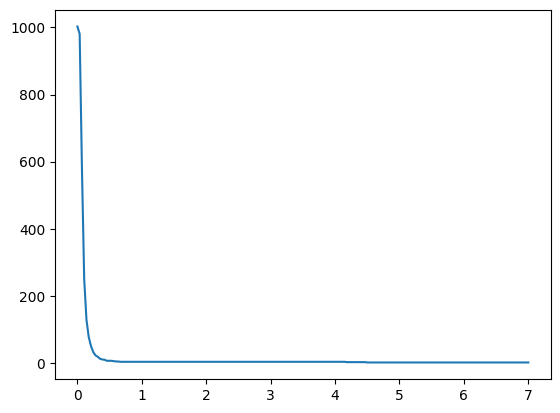

In [53]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y=number_of_outliers)

(0.0, 2.0)

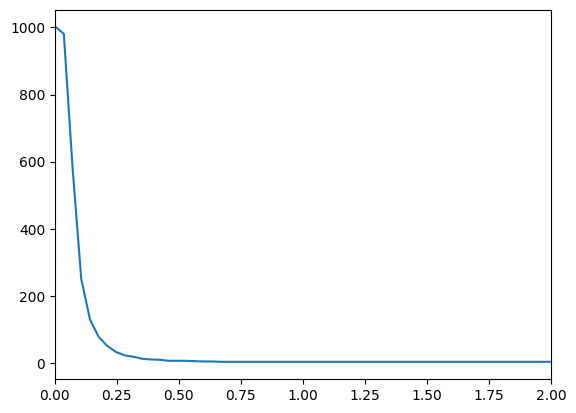

In [54]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y=number_of_outliers)
plt.xlim(0,2)

Text(0, 0.5, 'Процент точек-выбросов')

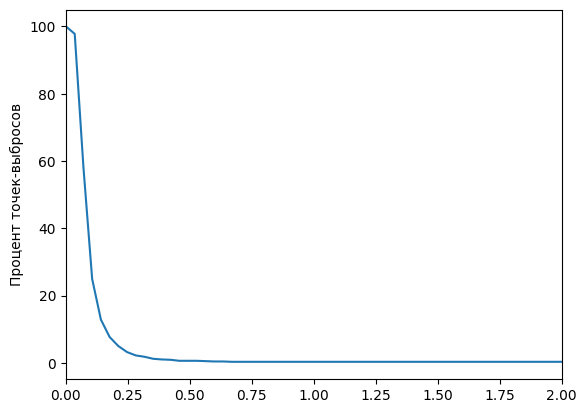

In [56]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y=outlier_percent)
plt.xlim(0,2)
plt.ylabel("Процент точек-выбросов")

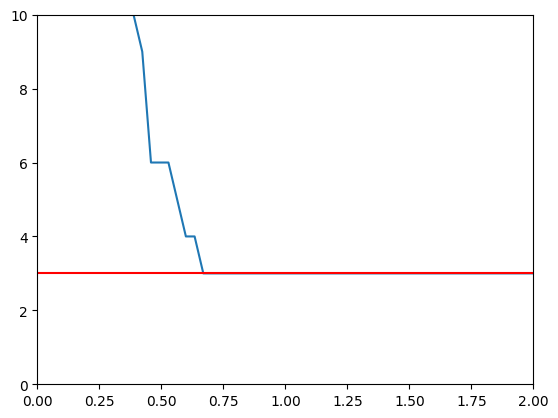

In [58]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y=number_of_outliers)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3, xmin=0, xmax=2, color="red")

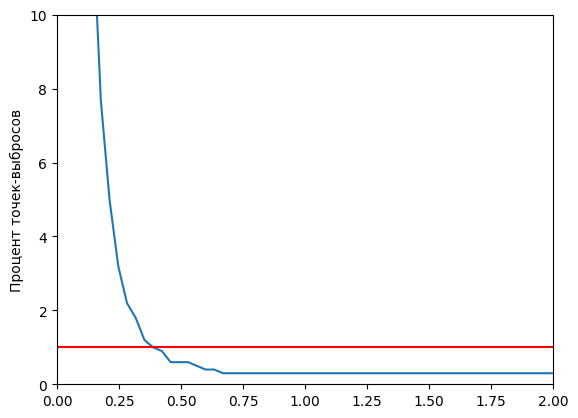

In [65]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y=outlier_percent)
plt.xlim(0,2)
plt.ylim(0,10)
plt.ylabel("Процент точек-выбросов")
plt.hlines(y=1, xmin=0, xmax=2, color="red")

In [66]:
outlier_percent = []
number_of_outliers = []

for n in np.arange(1, 100):
  dbscan = DBSCAN(min_samples=n)
  dbscan.fit(two_blobs_outliers)

  number_of_outliers.append(np.sum(dbscan.labels_ == -1))

  percent_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
  outlier_percent.append(percent_outliers)

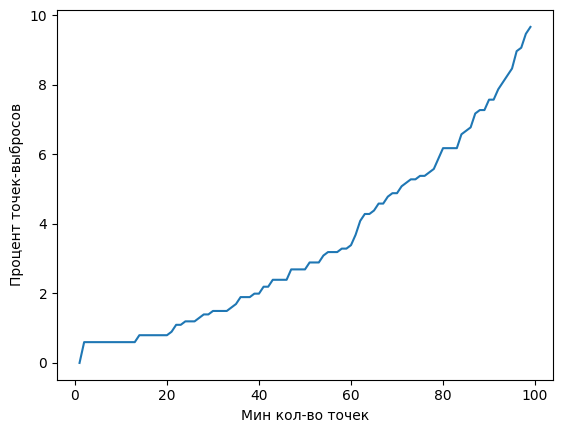

In [70]:
sns.lineplot(x=np.arange(1, 100), y=outlier_percent)
plt.xlabel("Мин кол-во точек")
plt.ylabel("Процент точек-выбросов");

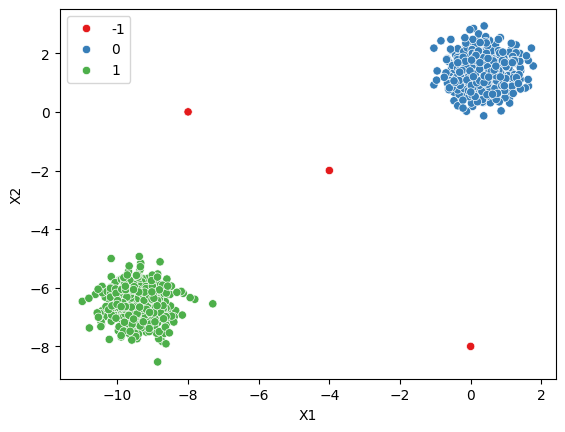

In [80]:
number_of_dimension = two_blobs_outliers.shape[1]

dbscan = DBSCAN(min_samples=2*number_of_dimension, eps=0.75)
display_categories(dbscan,two_blobs_outliers)